In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\DataScience\ML\screen_time.csv')

In [7]:
df.head()

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                     198 non-null    object 
 4   Average Screen Time (hours)  198 non-null    float64
 5   Sample Size                  198 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.4+ KB


In [10]:
df.isnull().sum()

Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64

In [11]:
df.describe()

,Age,Average Screen Time (hours),Sample Size
count,198.000000,198.000000,198.000000
mean,10.000000,2.993030,400.000000
std,3.170294,1.922822,63.405872
min,5.000000,0.440000,300.000000
25%,7.000000,1.402500,340.000000
50%,10.000000,2.490000,400.000000
75%,13.000000,4.397500,460.000000
max,15.000000,8.190000,500.000000


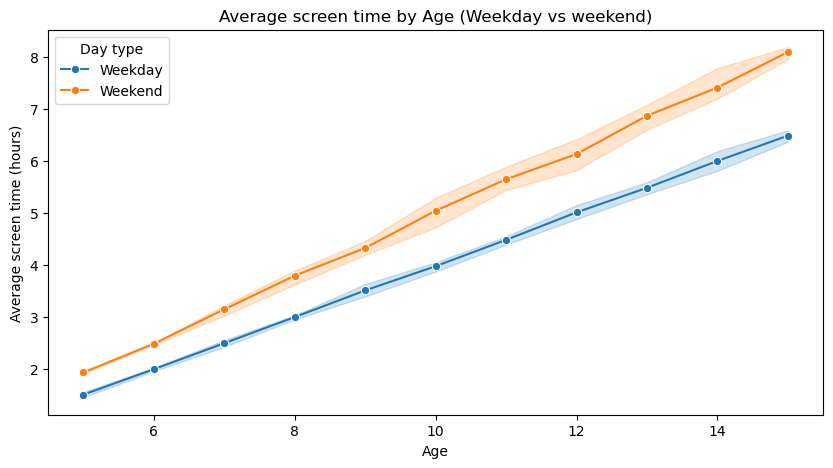

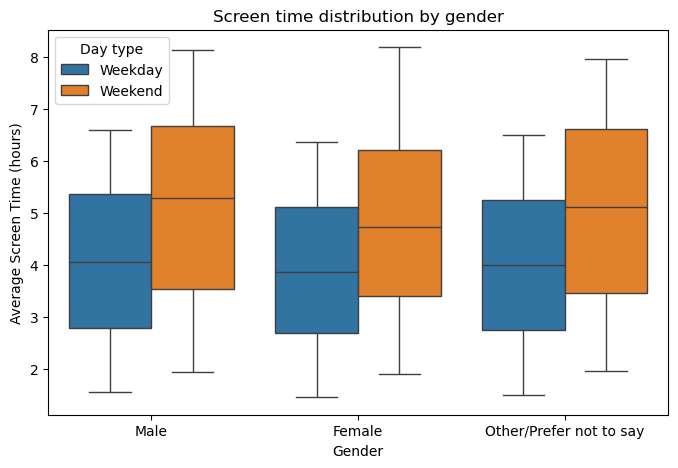

In [37]:
# Data visualization
# Average screen time by age
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[df['Screen Time Type'] == 'Total'], x='Age', y = 'Average Screen Time (hours)', hue='Day Type', marker='o')
plt.title('Average screen time by Age (Weekday vs weekend)')
plt.xlabel('Age')
plt.ylabel('Average screen time (hours)')
plt.legend(title='Day type')
plt.show()

# Distribution of screen time by gender 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['Screen Time Type'] == 'Total'], x='Gender', y='Average Screen Time (hours)', hue='Day Type')
plt.title('Screen time distribution by gender')
plt.legend(title='Day type')
plt.show()

In [43]:
# Predective modeling

# Convert categorical data 
df_ml = df[df['Screen Time Type'] == 'Total'].copy()
df_ml['Gender'] = df_ml['Gender'].astype('category').cat.codes
df_ml['Day Type'] = df_ml['Day Type'].map({'Weekday': 0, 'Weekend': 1})

In [47]:
# Selecting features and target variable
X = df_ml[['Age', 'Gender', 'Day Type']]
y = df_ml['Average Screen Time (hours)']

In [48]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# LinearRegression Model 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [53]:
print('LinearRegression Performance: ')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}')
print(f'MSE: {mean_squared_error(y_test, y_pred_lr):.3f}')
print(f'R**2 Score: {r2_score(y_test, y_pred_lr):.3f}')

LinearRegression Performance: 
MAE: 0.212
MSE: 0.061
R**2 Score: 0.987


In [54]:
df

,Age,Gender,Screen Time Type,Day Type,Average Screen Time (hours),Sample Size
0,5,Male,Educational,Weekday,0.44,500
1,5,Male,Recreational,Weekday,1.11,500
2,5,Male,Total,Weekday,1.55,500
3,5,Male,Educational,Weekend,0.50,500
4,5,Male,Recreational,Weekend,1.44,500
...,...,...,...,...,...,...
193,15,Other/Prefer not to say,Recreational,Weekday,5.16,300
194,15,Other/Prefer not to say,Total,Weekday,6.50,300
195,15,Other/Prefer not to say,Educational,Weekend,2.19,300
196,15,Other/Prefer not to say,Recreational,Weekend,5.77,300
